<a href="https://colab.research.google.com/github/joshipj22/Jamboree-and-the-Graduate-Admissions-Dataset/blob/main/jamboree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Link:**  https://colab.research.google.com/drive/178U_4scGoYMV0h__PTgiTb_kw1D9guBt?usp=sharing

# Jamboree and the Graduate Admissions Dataset

Jamboree is a leading educational institution known for its expertise in guiding students toward admission to prestigious international universities. They have a strong track record in helping students excel in standardized tests like the GRE, TOEFL, and SAT. To enhance their student support, Jamboree has developed a new online tool designed to estimate the probability of admission to Ivy League colleges specifically for Indian applicants.

This project utilizes a dataset containing various academic and personal attributes of past applicants, including GRE scores, TOEFL scores, University Ratings, Statement of Purpose (SOP) strength, Letter of Recommendation (LOR) strength, Cumulative Grade Point Average (CGPA), and Research experience. The goal is to analyze this data to understand the key factors influencing graduate admissions and build a predictive model to estimate an individual's 'Chance of Admit'. The insights gained will help Jamboree provide more personalized and data-driven guidance to Indian students aspiring to study at top Ivy League institutions.

### 1. Problem Statement Definition

**Objective:** To build a predictive model that estimates the probability of admission to Ivy League colleges for Indian applicants based on their academic profile and other relevant factors.

**Context:** Jamboree aims to provide a valuable tool for Indian students applying to top colleges abroad, specifically Ivy League institutions. A reliable predictive model will empower students to understand their admission chances and identify areas for improvement in their applications.

**Problem Statement:** Develop a machine learning model to predict the "Chance of Admit" for Indian students applying to Ivy League colleges, utilizing a dataset containing relevant academic and personal attributes. The model should be interpretable to help students understand the key factors influencing their admission probability.

###2. Importing the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [56]:
!gdown --id 1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4 --output Jamboree.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4
To: /content/Jamboree.csv
100% 16.2k/16.2k [00:00<00:00, 28.8MB/s]


In [57]:
data = pd.read_csv('Jamboree.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


* **Serial No.**: This column represents the unique row identifier for each applicant in the
dataset.
* **GRE Scores**: This column contains the GRE (Graduate Record Examination) scores of
the applicants, which are measured on a scale of 0 to 340.
* **TOEFL Scores**: This column includes the TOEFL (Test of English as a Foreign Language)
scores of the applicants, which are measured on a scale of 0 to 120.
* **University Rating**: This column indicates the rating or reputation of the university that the applicants are associated with. The rating is based on a scale of 0 to 5, with 5 representing the highest rating.
* **SOP**: This column represents the strength of the applicant's statement of purpose,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.
* **LOR**: This column represents the strength of the applicant's letter of recommendation,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.
* **CGPA**: This column contains the undergraduate Grade Point Average (GPA) of the
applicants, which is measured on a scale of 0 to 10.
* **Research**: This column indicates whether the applicant has research experience (1) or not (0).
* **Chance of Admit**: This column represents the estimated

**Checking the shape of dataframe provided**

In [58]:
print(f"The dataframe has {data.shape[0]} rows and {data.shape[1]} columns")

The dataframe has 500 rows and 9 columns


**Dropping any irrelevant column present in the dataset.**

In [59]:
data.drop(columns='Serial No.', inplace=True)
data.rename(columns={'Chance of Admit ':'Chance of Admit'}, inplace=True)

**Checking duplicate rows**

In [60]:
print(f"The no. of duplicate rows in the dataset are {int(data.duplicated().any())}")

The no. of duplicate rows in the dataset are 0


**Checking the data type of each column**

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [62]:
display(data.describe())

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Based on the information provided about the columns and the initial EDA using `data.head()`, `data.info()`, and `data.describe()`, here are some initial insights:

1.  **Data Size:** The dataset contains 400 rows and 9 columns. This is a moderately sized dataset for analysis.
2.  **Column Types:** All columns are numerical. 'Serial No.', 'GRE Scores', 'TOEFL Scores', 'University Rating', 'SOP', 'LOR', 'CGPA', and 'Research' are likely input features, and 'Chance of Admit' is the target variable.
3.  **Missing Values:** `data.info()` shows that there are no missing values across any of the columns, which simplifies the data cleaning process.
4.  **Comment on the range of attributes:** The features are on different scales:
    *   'GRE Scores' ranges from 290 to 340.
    *   'TOEFL Scores' ranges from 92 to 120.
    *   'University Rating', 'SOP', and 'LOR' range from 1 to 5 (the description mentioned 0 to 5, but the `describe()` output shows a minimum of 1).
    *   'CGPA' ranges from 6.8 to 9.92.
    *   'Research' is a binary feature (0 or 1).
    *   'Chance of Admit' ranges from 0.34 to 0.97.
5.  **Distribution of Features:**
    *   The mean GRE score is around 316.
    *   The mean TOEFL score is around 107.
    *   The mean University Rating is around 3.08.
    *   The mean SOP score is around 3.4.
    *   The mean LOR score is around 3.45.
    *   The mean CGPA is around 8.59.
    *   About 54% of applicants have research experience (mean of 0.54).
    *   The mean chance of admit is around 0.72.
6.  **Potential Relationships (Hypotheses to be explored with visualization):**
    *   There is likely a positive correlation between 'GRE Scores', 'TOEFL Scores', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', and 'Chance of Admit'. Higher scores/ratings/research experience should generally lead to a higher chance of admit.
    *   'Serial No.' is an identifier and should not be used as a feature in modeling.
    *   The distributions of some features might be skewed or have outliers, which could be investigated further with histograms or box plots.

The next steps in EDA should involve visualizations to understand the distributions of individual features and the relationships between the features and the target variable ('Chance of Admit'). This could include:

*   Histograms or KDE plots for continuous variables ('GRE Scores', 'TOEFL Scores', 'CGPA', 'Chance of Admit').
*   Count plots or bar plots for categorical/ordinal variables ('University Rating', 'SOP', 'LOR', 'Research').
*   Scatter plots to visualize the relationship between each feature and 'Chance of Admit'.
*   A heatmap to show the correlation matrix between all numerical features.

###3. Using Non-graphical and graphical analysis for getting insights about variables.
**Distribution of Continuous Features**

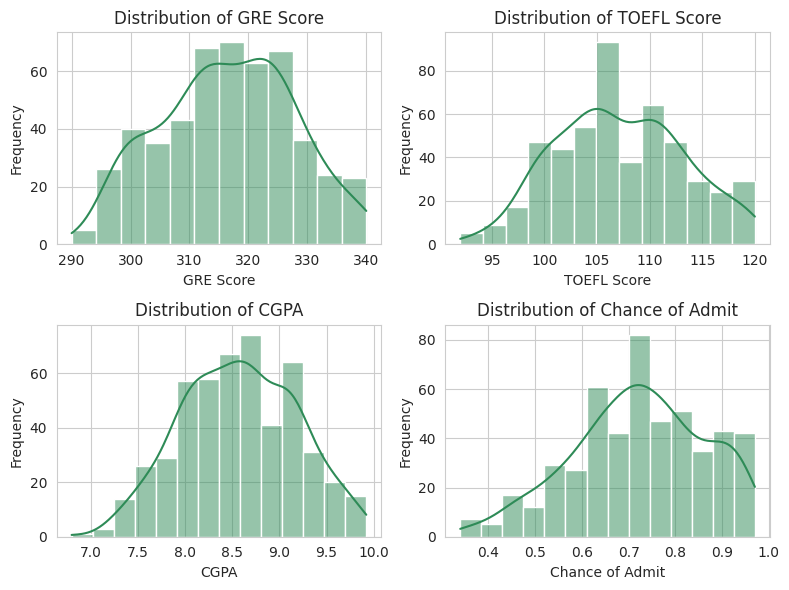

In [63]:
sns.set_style('whitegrid')

# Regenerate the plots with the new style
continuous_cols = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']
n_cols = len(continuous_cols)

plt.figure(figsize=(8, 6))

for i, col in enumerate(continuous_cols):
  plt.subplot(2, 2, i + 1)
  sns.histplot(data[col], kde=True, color='seagreen')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* GRE Score, TOEFL Score, and CGPA distributions are relatively symmetrical and resemble a normal distribution, although they might have a slight left skew.
* Chance of Admit has a noticeable left-skewed distribution, with more applicants having a higher chance of admission.

**Count plots or bar plots for categorical/ordinal variables**

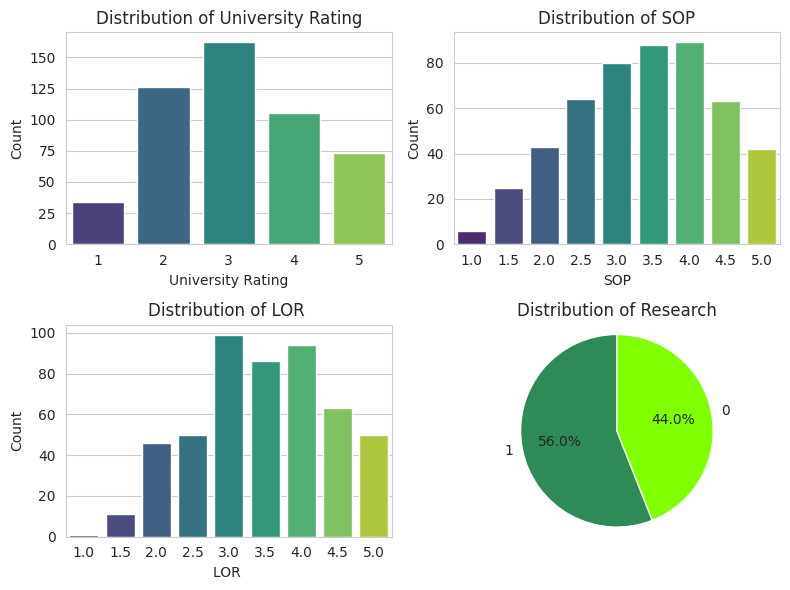

In [64]:
import matplotlib.pyplot as plt
categorical_cols = ['University Rating', 'SOP', 'LOR ', 'Research']

plt.figure(figsize=(8,6))

for i, col in enumerate(categorical_cols):
  if col == 'Research':
    plt.subplot(2, 2, i + 1)
    # Pie chart for Research
    research_counts = data[col].value_counts()
    plt.pie(research_counts, labels=research_counts.index, autopct='%1.1f%%', startangle=90, colors=['seagreen', 'chartreuse'])
    plt.title(f'Distribution of {col}')
    plt.axis('equal')
  else:
    plt.subplot(2, 2, i + 1)
    # Count plot for other categorical variables
    sns.countplot(x=col, data=data, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

* **University Ratings**: Most applicants are from universities rated 2, 3, or 4, with rating 3 being the most common.
* **SOP and LOR**: Scores for Statement of Purpose and Letter of Recommendation are spread, with common scores around 3.5 and 4, indicating generally moderate to strong application materials.
* **Research**: A majority of applicants (56%) have research experience.

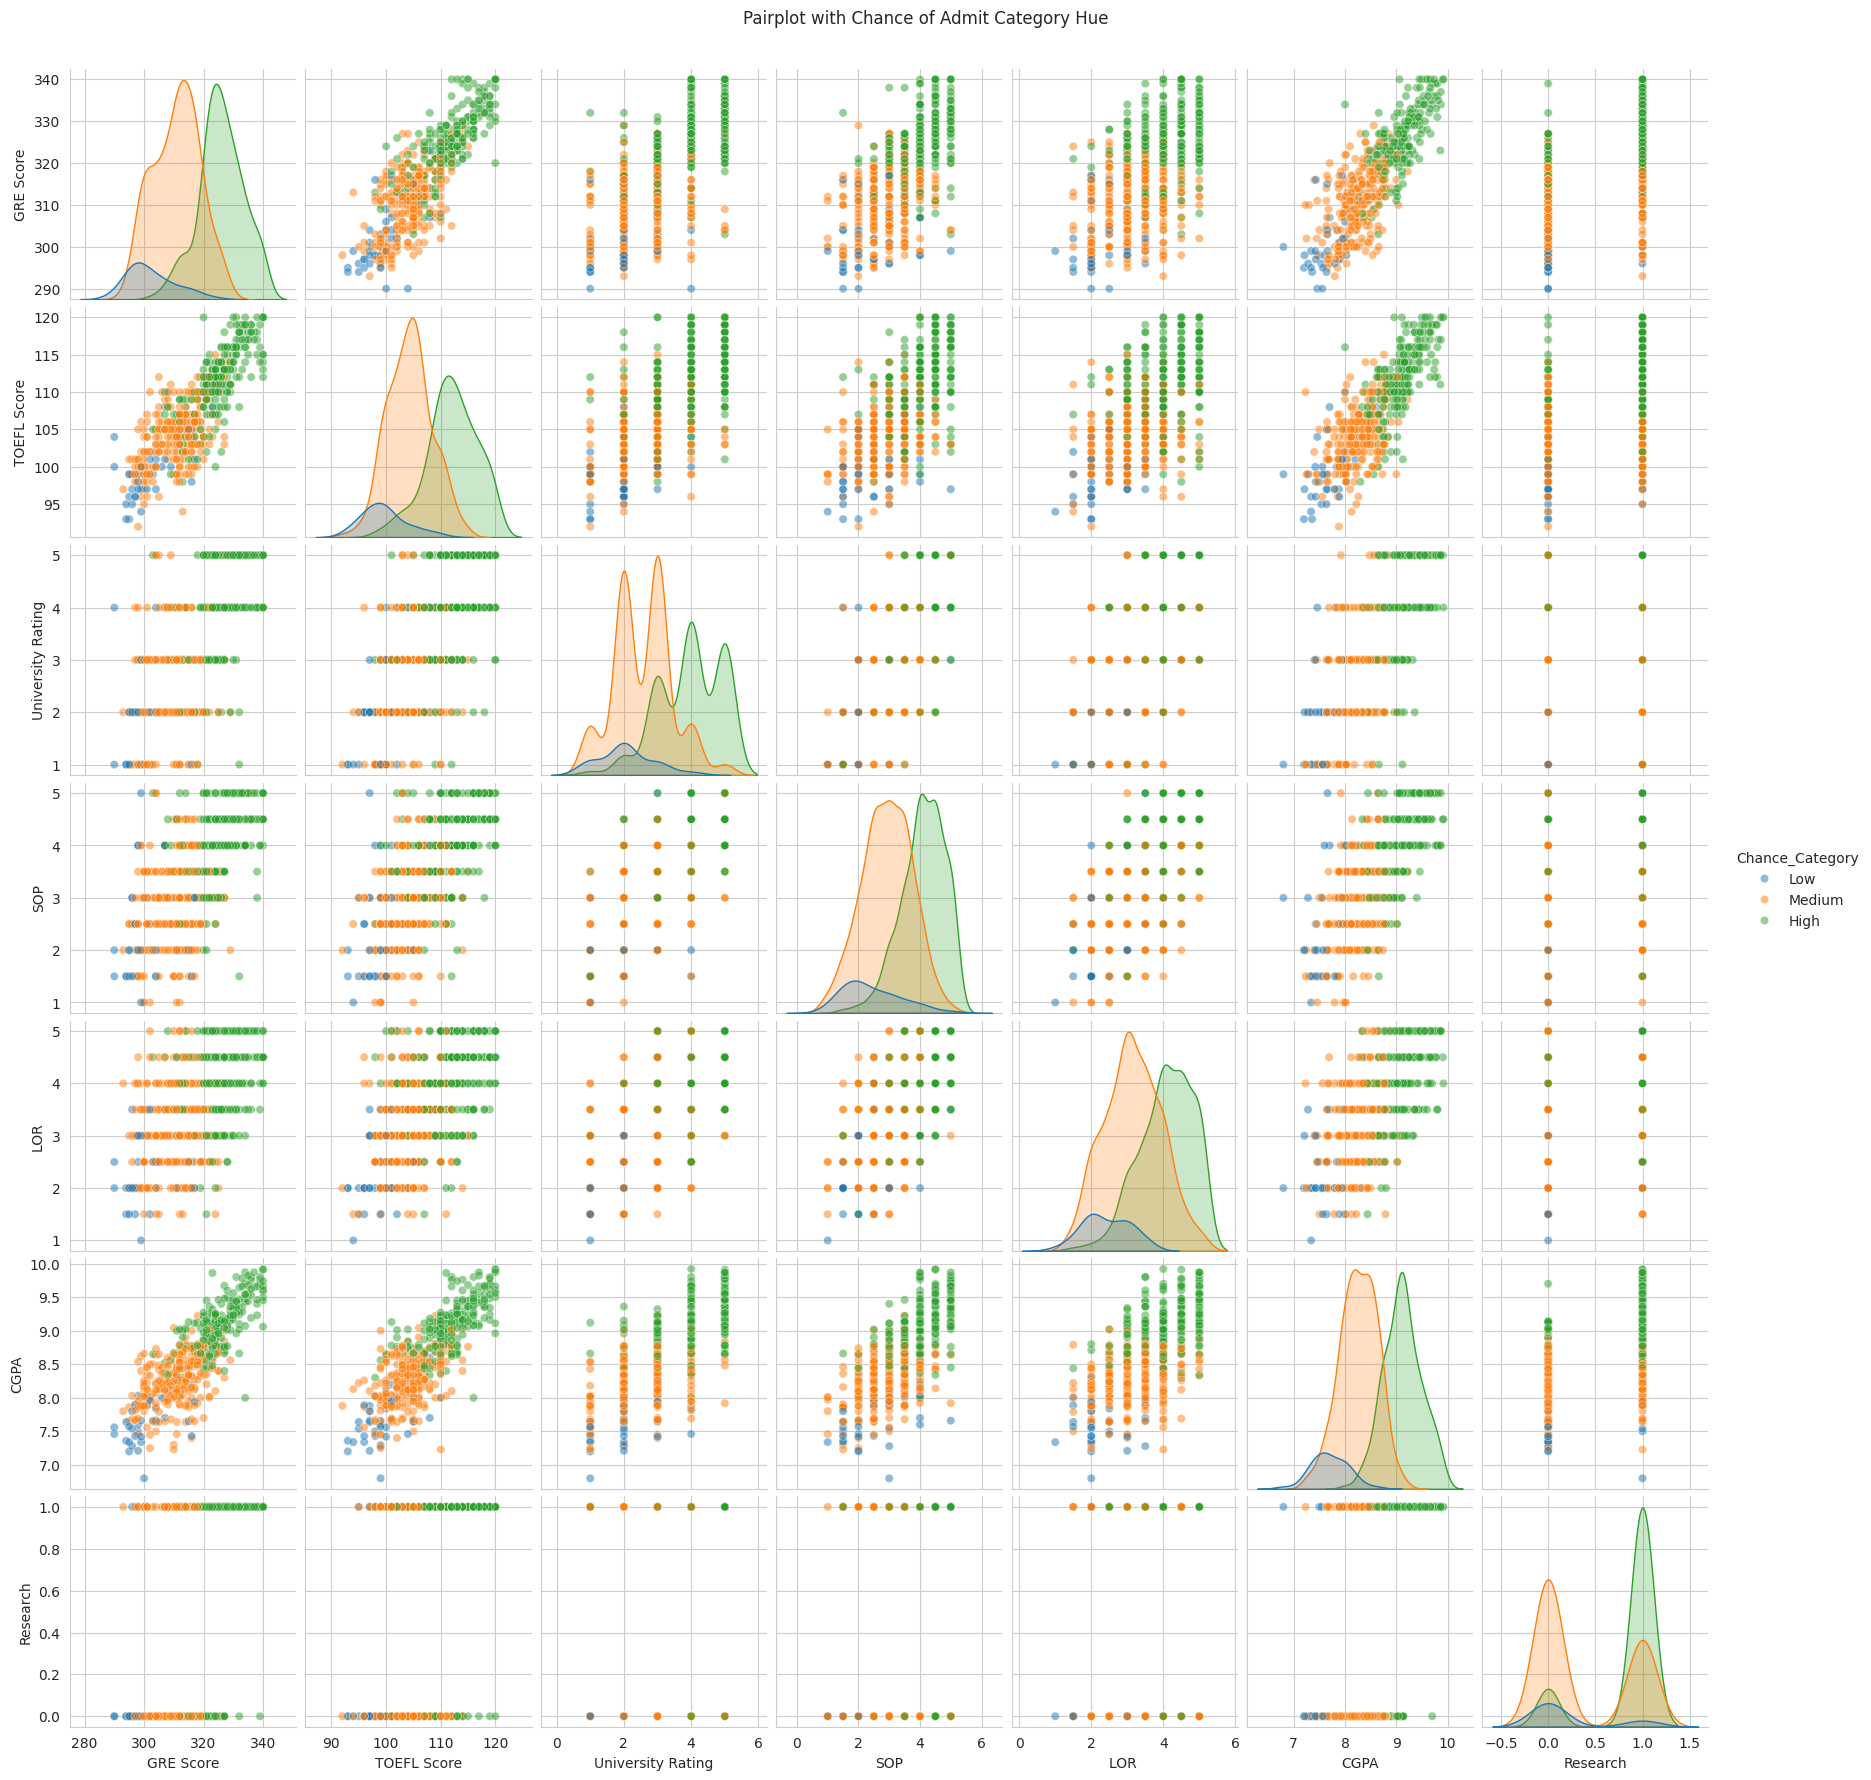

In [65]:
# Categorize 'Chance of Admit' into bins for better visualization with hue
data['Chance_Category'] = pd.cut(data['Chance of Admit'],
                                  bins=[0, 0.5, 0.75, 1.0],
                                  labels=['Low', 'Medium', 'High'],
                                  right=True,
                                  include_lowest=True)

sns.set_style('whitegrid')

# Generate the pairplot with hue
sns.pairplot(data,
             hue='Chance_Category',  # Use the categorized chance of admit as hue
             vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research'], # Specify the variables to plot
             plot_kws={'alpha':0.5},
             diag_kws={'color': 'seagreen'},
             palette='tab10') # Use a different palette for the discrete hue


plt.suptitle('Pairplot with Chance of Admit Category Hue', y=1.02) # Add a title to the pairplot
plt.show()

# Drop the temporary 'Chance_Category' column
data.drop(columns='Chance_Category', inplace=True)

**Relationships with 'Chance of Admit'**: The scatter plots in the bottom row (or the rightmost column) show how each feature relates to 'Chance of Admit'. We can clearly see positive linear trends between 'Chance of Admit' and 'GRE Score', 'TOEFL Score', and 'CGPA'. This visually confirms that as these scores increase, the chance of admission generally increases. The relationships with 'University Rating', 'SOP', 'LOR', and 'Research' also show a positive association, though they might not appear as strictly linear in the scatter plots due to their discrete nature

**Relationships Among Predictor Variables**: The other scatter plots show the relationships between the predictor variables themselves. We can observe strong positive correlations between:
'GRE Score' and 'TOEFL Score'
'GRE Score' and 'CGPA'
'TOEFL Score' and 'CGPA'
'University Rating' and 'SOP'
'University Rating' and 'LOR '
'SOP' and 'LOR ' These strong relationships among independent variables indicate the presence of multicollinearity in the dataset, which is an important consideration for model building.

**Distributions on the Diagonal**: The plots on the diagonal show the distribution of each individual feature (histograms or KDEs). We already discussed these distributions, noting that GRE, TOEFL, and CGPA are somewhat normally distributed, while 'Chance of Admit' is left-skewed. The distributions of the ordinal features ('University Rating', 'SOP', 'LOR ') and the binary feature ('Research') are also visible, showing the frequency of each category/value.

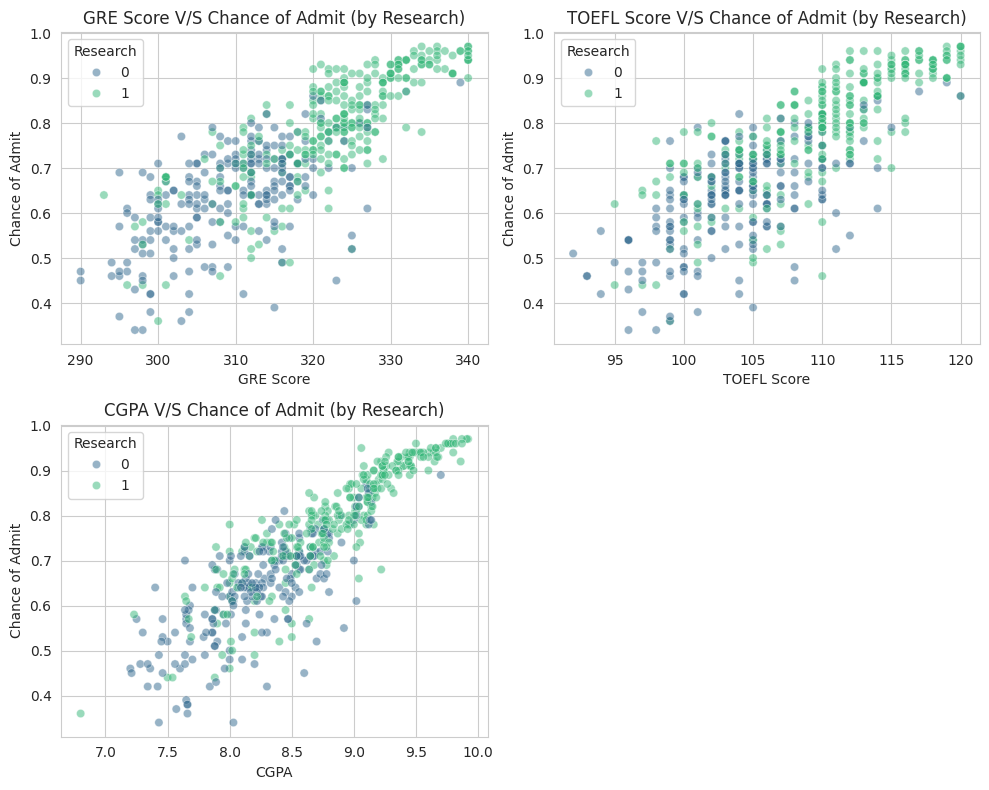

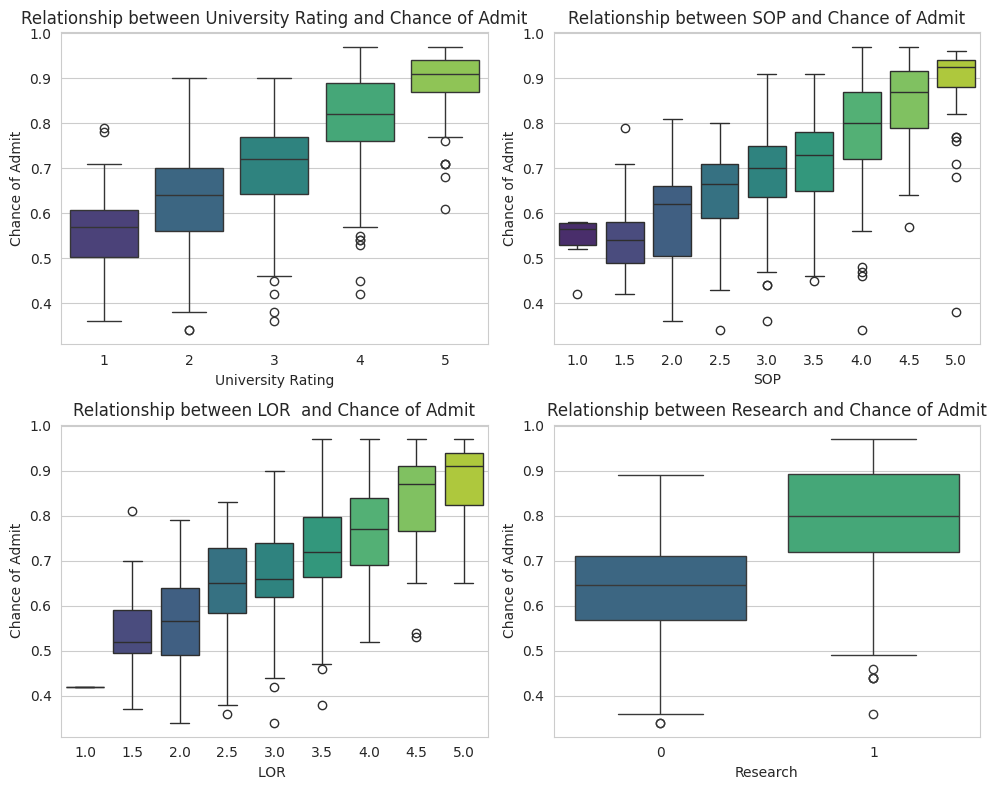

In [109]:
# Generating scatter plots with hue for continuous variables against 'Chance of Admit'
continuous_cols = ['GRE Score', 'TOEFL Score', 'CGPA']

plt.figure(figsize=(10,8))

for i, col in enumerate(continuous_cols):
  plt.subplot(2, 2, i + 1)
  # Use scatterplot instead of regplot to easily add hue
  sns.scatterplot(x=col, y='Chance of Admit', data=data, hue='Research', palette='viridis', alpha=0.5)
  # Optionally, you can still add a regression line for the overall trend
  # sns.regplot(x=col, y='Chance of Admit', data=data, scatter=False, line_kws={'color': 'red'})
  plt.title(f'{col} V/S Chance of Admit (by Research)')
  plt.xlabel(col)
  plt.ylabel('Chance of Admit')

plt.tight_layout()
plt.show()

# Generating box plots for categorical/ordinal variables against 'Chance of Admit' (keep as is)
categorical_cols = ['University Rating', 'SOP', 'LOR ', 'Research']

plt.figure(figsize=(10,8))

for i, col in enumerate(categorical_cols):
  plt.subplot(2, 2, i + 1)
  sns.boxplot(x=col, y='Chance of Admit', data=data, palette='viridis')
  plt.title(f'Relationship between {col} and Chance of Admit')
  plt.xlabel(col)
  plt.ylabel('Chance of Admit')

plt.tight_layout()
plt.show()

Based on the exploratory data analysis using both non-graphical (`describe()`) and graphical methods (histograms, count plots, pairplot, regplots, box plots, and correlation heatmap), the following key insights and recommendations were derived:

**Insights:**

1.  **Distribution of Continuous Features:** Histograms and KDE plots revealed that 'GRE Score', 'TOEFL Score', and 'CGPA' distributions are roughly symmetrical, resembling a normal distribution. 'Chance of Admit', the target variable, showed a left-skewed distribution, indicating that a larger number of applicants in this dataset have a higher chance of admission.
2.  **Distribution of Categorical/Ordinal Features:** Count plots and pie charts illustrated the frequency of each category for 'University Rating', 'SOP', 'LOR', and 'Research'. 'University Rating' saw the most applicants from ratings 2, 3, and 4. 'SOP' and 'LOR' scores were concentrated around 3.5 and 4. A majority (56%) of the applicants had research experience.
3.  **Relationships with 'Chance of Admit':**
    *   **Continuous Variables:** Regplots and scatter plots in the pairplot clearly showed strong positive linear relationships between 'Chance of Admit' and 'GRE Score', 'TOEFL Score', and 'CGPA'. As these scores increased, the probability of admission generally increased. The correlation heatmap confirmed these strong positive correlations.
    *   **Categorical/Ordinal Variables:** Box plots and scatter plots revealed positive associations between 'Chance of Admit' and 'University Rating', 'SOP', 'LOR', and 'Research'. Higher ratings and scores in these areas, as well as having research experience, were associated with a higher median 'Chance of Admit'.
4.  **Relationships Among Predictor Variables (Multicollinearity):** The pairplot and correlation heatmap highlighted notable positive correlations among the independent variables themselves, particularly between 'GRE Score', 'TOEFL Score', and 'CGPA', and among 'University Rating', 'SOP', and 'LOR'. This indicated the presence of multicollinearity in the dataset.
5.  **Outliers:** Initial checks using the IQR method identified a few potential outliers in 'LOR' and 'Chance of Admit'. However, these were considered valid data points within the context of the dataset.

**Recommendations:**

*   The strong positive relationships observed between the independent variables and 'Chance of Admit' suggest that a linear model is a reasonable approach for prediction.
*   The presence of multicollinearity among predictor variables needs to be considered during model building, as it can affect coefficient interpretation. Techniques like VIF analysis should be used to assess and potentially address this.
*   While outliers were identified, they were retained as they represent genuine data points. The potential impact of these outliers on model performance should be monitored, and robust modeling techniques could be considered if necessary.
*   The insights gained from this analysis provide a solid foundation for feature selection and model building in the subsequent steps.

###4. Performing data preprocessing.

**Checking Null and Dublicate records**

In [67]:
# Checking for null values in DataFrame
null_counts = data.isnull().sum()
print("-"*100)
# Displaying the count of null values in any rows
print(f"Rows containing null value:{int(null_counts.any())}")
print("-"*100)

#Checking for duplicate rows
print(f"The no. of duplicate rows in the dataset are {int(data.duplicated().any())}")
print("-"*100)

----------------------------------------------------------------------------------------------------
Rows containing null value:0
----------------------------------------------------------------------------------------------------
The no. of duplicate rows in the dataset are 0
----------------------------------------------------------------------------------------------------


**Checking for outliers**

In [68]:
#filtering the numeric variables from the data
import scipy.stats as stats
#computing zscore of numerical features
df_num=data.select_dtypes(exclude='object')
z=np.abs(stats.zscore(df_num))
#printing the feature and no. of rows where z score is more than 3
print("The no. of outliers in every featres are as follows")
for elem in df_num.columns:
  print(f"{elem}: {len(np.where(z>3)[0])}")

The no. of outliers in every featres are as follows
GRE Score: 0
TOEFL Score: 0
University Rating: 0
SOP: 0
LOR : 0
CGPA: 0
Research: 0
Chance of Admit: 0


**Just to be sure let's check the outliers beneath 1st and beyond 3rd quartile**

In [69]:
# Checking for outliers using the IQR method

for col in df_num.columns:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_num[(df_num[col] < lower_bound) | (df_num[col] > upper_bound)]

    print(f"Outliers for {col}: {len(outliers)}")
    if len(outliers) > 0:
        display(outliers)

Outliers for GRE Score: 0
Outliers for TOEFL Score: 0
Outliers for University Rating: 0
Outliers for SOP: 0
Outliers for LOR : 1


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


Outliers for CGPA: 0
Outliers for Research: 0
Outliers for Chance of Admit: 2


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


In [70]:
df=df_num[~((df_num<lower_bound)|(df_num>upper_bound)).any(axis=1)]


In [71]:
# Checking for outliers using the IQR method
for col in df_num.columns:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_num[(df_num[col] < lower_bound) | (df_num[col] > upper_bound)]

    print(f"Outliers for {col}: {len(outliers)}")
    if len(outliers) > 0:
        display(outliers)

Outliers for GRE Score: 0
Outliers for TOEFL Score: 0
Outliers for University Rating: 0
Outliers for SOP: 0
Outliers for LOR : 1


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


Outliers for CGPA: 0
Outliers for Research: 0
Outliers for Chance of Admit: 2


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


In [72]:
# Calculate Q1, Q3, and IQR for each column
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask to identify rows with outliers
outlier_mask = ((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)

# Remove rows with outliers
df_cleaned = df_num[~outlier_mask]

print(f"Original number of rows: {len(df_num)}")
print(f"Number of rows after removing outliers: {len(df_cleaned)}")

Original number of rows: 500
Number of rows after removing outliers: 497


**Insights:**

*   No missing values or duplicate rows found.
*   No outliers detected by the z-score method.
*   A few valid outliers identified in 'LOR ' and 'Chance of Admit' by the IQR method.

**Recommendations:**

*   Keep the outliers as they appear to be genuine data points.
*   Consider robust modeling techniques or data transformations if outliers impact model performance.
*   Proceed with feature scaling (if necessary) and model building as the data is clean regarding nulls and duplicates.

###5. Check the correlation among independent variables and how they interact with each other.

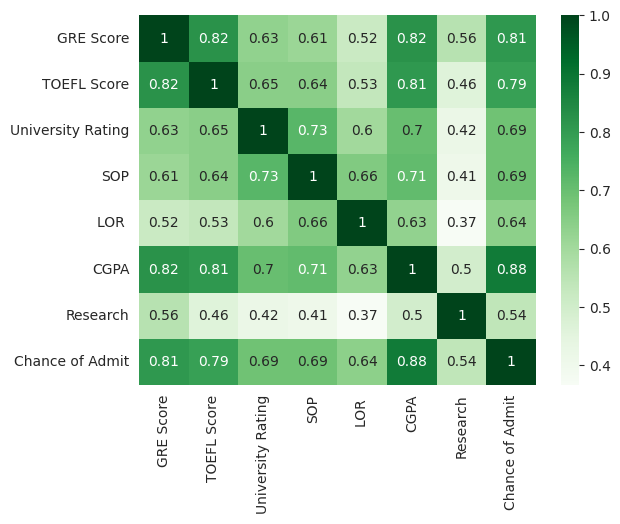

In [73]:
sns.heatmap(df_cleaned.corr(method='pearson'), annot=True, cmap='Greens')
plt.show()

**Insights and Recommendations from Pearson Correlation Heatmap:**

**Insights:**

*   'CGPA', 'GRE Score', and 'TOEFL Score' are the strongest linear predictors of 'Chance of Admit'.
*   Significant multicollinearity exists among 'GRE Score', 'TOEFL Score', and 'CGPA', as well as among 'University Rating', 'SOP', and 'LOR '.
* I have correctly identified the presence of multicollinearity among some of the predictor variables (e.g., GRE, TOEFL, and CGPA). While linear regression models can still be built with multicollinearity, it can affect the interpretation of individual feature coefficients and their statistical significance. For predictive purposes, it might not be a major issue unless the multicollinearity is perfect(Pearson correlation > 0.90). If interpretability is crucial, we might have to consider techniques like Variance Inflation Factor (VIF) analysis to quantify multicollinearity and potentially address it by removing one of the highly correlated variables or using dimensionality reduction techniques like PCA (though this would come at the cost of interpretability).

**Recommendations:**

*   No features have a Pearson correlation > 0.90 with another, so none are removed based on this criterion.
*   Be mindful of multicollinearity when choosing and interpreting models (e.g., consider VIF or models less sensitive to multicollinearity).
*   Feature scaling might be necessary depending on the chosen model.

###6. Preparing the data for modeling.

For a linear regression model, it is generally recommended to keep 'University Rating', 'SOP', and 'LOR' in their original ordinal numerical format, since they have limited categories.Therefore Target Encoding them can cause Overfitting. Linear regression can interpret these numerical values directly, assuming a linear relationship between the value and the target variable. Encoding techniques like one-hot encoding are typically used for nominal categorical variables where there is no inherent order.

In [74]:
#Lets'do target encoding of the categorical features,
#df_cat=df_cleaned[['University Rating', 'SOP','LOR ']]
#for feature in df_cat:
  #df_cleaned[feature]=df_cleaned.groupby(feature)['Chance of Admit'].transform('mean')
#df_cleaned.head()


**Performing the train-test split**

In [75]:
X=df_cleaned.drop(columns='Chance of Admit')
Y=df_cleaned['Chance of Admit']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

**Given** that 'GRE Score', 'TOEFL Score', and 'CGPA' distributions are relatively symmetrical and resemble a normal distribution, Z-score normalization (StandardScaler) is often a good choice.

In [76]:
from sklearn.preprocessing import StandardScaler

# Select the continuous columns to scale
continuous_cols = ['GRE Score', 'TOEFL Score', 'CGPA','University Rating', 'SOP','LOR ']
scaler = StandardScaler()

# Fit the scaler ONLY on the continuous columns of the training data
scaler.fit(X_train[continuous_cols])

# Transform the continuous columns of both training and testing data
X_TRAIN = X_train.copy()
X_TRAIN[continuous_cols] = scaler.transform(X_train[continuous_cols])

X_TEST = X_test.copy()
X_TEST[continuous_cols] = scaler.transform(X_test[continuous_cols])

display(X_TRAIN.head())
display(X_TEST.head())

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
229,0.679289,0.642345,0.813684,-0.342177,-0.510520,0.742038,1
108,1.299850,1.470302,1.689111,1.655533,1.668797,1.353424,1
458,-0.384529,-1.179162,-1.812596,-0.342177,-0.510520,-0.051112,1
232,-0.384529,-0.020021,-0.937170,-0.841605,0.034309,-0.480735,0
302,0.501986,-0.351204,-0.937170,-0.342177,-0.510520,-0.183304,1


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
276,1.122547,0.973528,1.689111,1.655533,1.123968,1.469092,1
443,0.413335,1.139119,1.689111,1.156106,1.123968,0.989897,1
153,0.679289,-0.351204,-0.061743,-0.342177,0.579138,0.312415,0
305,0.413335,0.311162,-0.061743,0.157250,0.034309,0.395035,1
147,0.856592,1.139119,-0.061743,-0.342177,-0.510520,0.907278,1


In [102]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

models = [
           ['Linear Regression :', LinearRegression()],

          ['Lasso Regression :', Lasso(alpha=0.1)], #try with different alpha values
          ['Ridge Regression :', Ridge(alpha=1.0)] #try with different alpha values
          ]

print("MSE results, without removing features with multicollinearity ...")


for name,model in models:
    model.fit(X_TRAIN, Y_train.values) # train the model coeffecients
    predictions = model.predict(X_TEST)

    print(name, (np.sqrt(mean_squared_error(Y_test, predictions))))

MSE results, without removing features with multicollinearity ...
Linear Regression : 0.06384273933455327
Lasso Regression : 0.11520119392936157
Ridge Regression : 0.0638721175642599


**Insights:**

*   **Categorical Feature Handling:** We decided to keep 'University Rating', 'SOP', and 'LOR' as ordinal numerical features rather than using one-hot encoding, considering their limited categories and the linear model's ability to interpret numerical values.
*   **Train-Test Split:** The data was split into training and testing sets (`X_train`, `X_test`, `Y_train`, `Y_test`) using `train_test_split` with a test size of 20% and a `random_state` for reproducibility. This is a crucial step for evaluating the model's performance on unseen data.
*   **Feature Scaling:** All features except 'Research' (`'GRE Score', 'TOEFL Score', 'CGPA', 'University Rating', 'SOP', 'LOR '`) were scaled using `StandardScaler`.
*   **Regression Technique:** MSE was used to determine the best regression technique among Linear, Lasso and Ridge. Based on which Linear Regression had the least MSE.

**Recommendations:**

*   The data preparation steps (train-test split and scaling) were appropriate for training linear regression models, including those with regularization.
*   The decision to treat 'University Rating', 'SOP', and 'LOR' as ordinal numerical features and scale them along with other continuous features is a valid approach for a linear model, especially when regularization is used.
*   The custom linear model implementation is valuable for understanding the algorithm, while library implementations are generally preferred for practical applications.

###7. Building the Linear Regression model from scratch

In [77]:

class LinearRegression():
  def __init__(self,iterations=5,learning_rate=.05):
    self.iterations=iterations
    self.learning_rate=learning_rate

  def update_weights(self):
    y_pred=self.predict(self.X)
    dw=-2*np.dot(self.X.T,(self.Y-y_pred))/self.m
    db=-2*np.sum(self.Y-y_pred)/self.m
    self.w=self.w- self.learning_rate*dw
    self.b=self.b- self.learning_rate*db
    return self

  def predict(self,X):
    return np.dot(X,self.w)+self.b

  def r2_score(self,X,Y):
    y_=self.predict(X)
    ss_res=np.sum((Y-y_)**2)
    ss_tot=np.sum((Y-Y.mean())**2)
    score= 1-(ss_res/ss_tot)
    return score

  def fit(self,X,Y):
    self.X=X
    self.Y=Y
    self.m,self.d=X.shape
    self.w=np.zeros(self.d)
    self.b=0
    self.error_list=[]
    for i in range(self.iterations):
      y_pred=self.predict(self.X)
      self.update_weights()
      err=np.mean((self.Y-y_pred)**2)
      self.error_list.append(err)
    return self


In [78]:
lr=LinearRegression(iterations=10000,learning_rate=0.01)
lr.fit(X_TRAIN,Y_train)

In [79]:
lr.predict(X_TEST)

array([0.91102814, 0.85685145, 0.74807271, 0.76990223, 0.81383167,
       0.82744368, 0.85676944, 0.96939104, 0.83425629, 0.69323953,
       0.72604766, 0.66355165, 0.83468062, 0.59103577, 0.55615533,
       0.74834053, 0.85038865, 0.94415172, 0.81764243, 0.62002224,
       0.67225736, 0.7783407 , 0.6219009 , 0.65288696, 0.58480285,
       0.96006204, 0.69158409, 0.4550628 , 0.69964077, 0.84327013,
       0.83182502, 0.62264393, 0.71902147, 0.70251625, 0.62425416,
       0.79565177, 0.60296531, 0.49689279, 0.69152533, 0.69059178,
       0.80363197, 0.60674986, 0.79788495, 0.78528805, 0.95349748,
       0.56620142, 0.79826965, 0.78702604, 0.95173691, 0.71139862,
       0.84605884, 0.66646536, 0.63941021, 0.77826244, 0.9437362 ,
       0.66929398, 0.9848504 , 0.60195554, 0.86272561, 0.71973493,
       0.70876092, 0.89676595, 0.7019447 , 0.56057079, 0.856571  ,
       0.9378317 , 0.71960465, 0.6948136 , 0.67997296, 0.60779852,
       0.90930994, 0.67299025, 0.61091233, 0.57084703, 0.70280

In [80]:
lr.r2_score(X_TRAIN,Y_train)

np.float64(0.8318000105962944)

In [81]:
lr.r2_score(X_TEST,Y_test)

np.float64(0.7688535577011661)

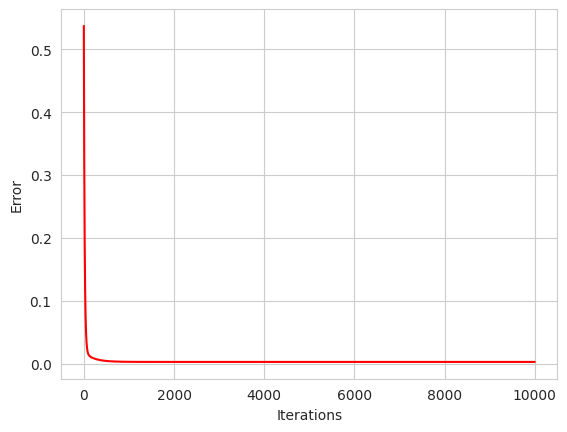

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(lr.error_list,color='red')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

In [83]:
# Display the coefficients (weights)
print("Model Coefficients (Weights):")
# Pair feature names with their corresponding weights
feature_names = X_TRAIN.columns
for feature, weight in zip(feature_names, lr.w):
    print(f"{feature}: {weight}")

# Display the intercept (bias)
print("\nModel Intercept (Bias):")
print(lr.b)

Model Coefficients (Weights):
GRE Score: 0.02471547932249087
TOEFL Score: 0.011720386487613582
University Rating: 0.006324942208499818
SOP: 0.0104831684956013
LOR : 0.01311954064906739
CGPA: 0.06960299977100058
Research: 0.016801268686925133

Model Intercept (Bias):
0.7100345614255194


In [84]:
import statsmodels.api as sm
X_sm = sm.add_constant(X_TRAIN)
model = sm.OLS(Y_train, X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     274.8
Date:                Thu, 03 Jul 2025   Prob (F-statistic):          2.72e-146
Time:                        06:58:43   Log-Likelihood:                 571.83
No. Observations:                 397   AIC:                            -1128.
Df Residuals:                     389   BIC:                            -1096.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7100      0.00

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm # Import statsmodels

# Make predictions on the test set
# Add a constant term to X_TEST before predicting with the statsmodels model
X_TEST_sm = sm.add_constant(X_TEST)
Y_pred = model.predict(X_TEST_sm)

# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.0459
Mean Squared Error (MSE): 0.0041
Root Mean Squared Error (RMSE): 0.0638
R-squared (R2): 0.7689


**Since only University Rating has p_value>.05, we will drop this feature and re-train the model.**

In [86]:
X_TRAIN_TRIM = X_TRAIN.copy()
X_TEST_TRIM = X_TEST.copy()
X_TRAIN_TRIM.drop(columns='University Rating',inplace=True)
X_TEST_TRIM.drop(columns='University Rating',inplace=True)

In [110]:
X_sm = sm.add_constant(X_TRAIN_TRIM)
model = sm.OLS(Y_train, X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     319.6
Date:                Thu, 03 Jul 2025   Prob (F-statistic):          3.69e-147
Time:                        08:56:58   Log-Likelihood:                 570.88
No. Observations:                 397   AIC:                            -1128.
Df Residuals:                     390   BIC:                            -1100.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7098      0.005    142.260      

In [88]:
# Make predictions on the test set
# Add a constant term to X_TEST before predicting with the statsmodels model
X_TEST_sm = sm.add_constant(X_TEST_TRIM)
Y_pred = model.predict(X_TEST_sm)

# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.0461
Mean Squared Error (MSE): 0.0041
Root Mean Squared Error (RMSE): 0.0639
R-squared (R2): 0.7682


**Insights:**

*   We decided to keep 'University Rating', 'SOP', and 'LOR' as ordinal numerical features rather than using one-hot encoding, considering their limited categories and the linear model's ability to interpret numerical values. This choice was based on the assumption of a linear relationship between these ordinal values and the target, which is a common practice but worth noting.
*   The data was split into training and testing sets (`X_train`, `X_test`, `Y_train`, `Y_test`) using `train_test_split` with a test size of 20% and a `random_state` for reproducibility. This is a crucial step for evaluating the model's performance on unseen data.
*   Continuous features ('GRE Score', 'TOEFL Score', 'CGPA') were scaled using `StandardScaler`. This is important for models sensitive to feature scales, like linear regression when using gradient descent or regularization, as it helps ensure that features contribute proportionally to the model and can improve convergence speed. Categorical/ordinal features ('University Rating', 'SOP', 'LOR', 'Research') were not scaled, which is appropriate given their nature.

**Custom Model Implementation Insights:**

*   We successfully implemented a Linear Regression model from scratch using gradient descent for parameter optimization. The model was trained on the scaled continuous features and the original categorical/ordinal features of the training data.
*   The custom `LinearRegression` class includes key methods for initializing parameters, updating weights via gradient descent, making predictions, calculating the R-squared score, and fitting the model iteratively.

**Recommendations:**

*   The data preparation steps (train-test split and scaling) were appropriate for training a linear regression model and evaluating its generalization performance.
*   The decision to treat 'University Rating', 'SOP', and 'LOR' as ordinal numerical features is reasonable for a linear model, but exploring the impact of other encoding methods could be a point for further experimentation if model performance or interpretation require it.
*   Building the linear model from scratch is valuable for understanding the underlying algorithm. For practical applications, using optimized library implementations is generally more efficient and robust.

### 8. Testing the assumptions of linear regression.

**a. Multicollinearity check by VIF score**

Variables are dropped one-by-one till none has a VIF>5.

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_TRAIN_TRIM.columns
vif['VIF']=[variance_inflation_factor(X_TRAIN_TRIM.values,i) for i in range(X_TRAIN_TRIM.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,CGPA,4.44
0,GRE Score,4.13
1,TOEFL Score,3.76
2,SOP,2.49
3,LOR,1.95
5,Research,1.19


Lets keep on removing features one by one till we see features with VIF atmost 5

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_thr = 5
features_removed = []

# Create a copy of the training data to modify during the VIF analysis
X_TRAIN_VIF = X_TRAIN_TRIM.copy()

while True:
    vif = pd.DataFrame()
    vif['Features'] = X_TRAIN_VIF.columns
    vif['VIF'] = [variance_inflation_factor(X_TRAIN_VIF.values, j) for j in range(X_TRAIN_VIF.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)

    # Display current VIF and model summary
    display(vif)
    X_sm = sm.add_constant(X_TRAIN_VIF)
    sm_model = sm.OLS(Y_train, X_sm).fit()
    print(sm_model.summary())


    # Check the highest VIF
    highest_vif_feature = vif.iloc[0]["Features"]
    highest_vif_value = vif.iloc[0]["VIF"]

    if highest_vif_value <= vif_thr:
        print("Threshold Reached")
        print("Highest VIF:", highest_vif_value)
        print("Current adj.R2", sm_model.rsquared_adj)
        print("Features removed:", len(features_removed))
        print("List of Features removed:", features_removed)
        # Update X_TRAIN_FINAL to the features that remain
        X_TRAIN_FINAL = X_TRAIN_VIF.copy()
        break
    else:
        # Remove the feature with the highest VIF
        features_removed.append(highest_vif_feature)
        X_TRAIN_VIF = X_TRAIN_VIF.drop(columns=[highest_vif_feature])

,Features,VIF
4,CGPA,4.44
0,GRE Score,4.13
1,TOEFL Score,3.76
2,SOP,2.49
3,LOR,1.95
5,Research,1.19


                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     319.6
Date:                Thu, 03 Jul 2025   Prob (F-statistic):          3.69e-147
Time:                        06:58:43   Log-Likelihood:                 570.88
No. Observations:                 397   AIC:                            -1128.
Df Residuals:                     390   BIC:                            -1100.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7098      0.005    142.260      

In [91]:
# Drop the feature identified for removal ('SOP') from the test set as well
X_TEST_FINAL = X_TEST_TRIM.drop(columns=features_removed)

# Re-train the linear regression model with the final feature set (already done in the previous VIF loop for X_TRAIN_FINAL)
# Evaluate the model on the test set with the final features
X_TEST_FINAL_sm = sm.add_constant(X_TEST_FINAL) # Add a constant term to X_TEST_FINAL
Y_pred_final = sm_model.predict(X_TEST_FINAL_sm)


# Calculate evaluation metrics
mae_final = mean_absolute_error(Y_test, Y_pred_final)
mse_final = mean_squared_error(Y_test, Y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(Y_test, Y_pred_final)

# Display the metrics
print("Model Performance after removing high VIF features (on Test Set):")
print(f"Mean Absolute Error (MAE) for test set: {mae_final:.4f}")
print(f"Mean Squared Error (MSE) for test set: {mse_final:.4f}")
print(f"Root Mean Squared Error (RMSE) for test set: {rmse_final:.4f}")
print(f"R-squared (R2) for test set: {r2_final:.4f}")

Model Performance after removing high VIF features (on Test Set):
Mean Absolute Error (MAE) for test set: 0.0461
Mean Squared Error (MSE) for test set: 0.0041
Root Mean Squared Error (RMSE) for test set: 0.0639
R-squared (R2) for test set: 0.7682


**b. Calculating the mean of the residuals directly, we would use:**

In [92]:
# Calculate the residuals for the training data using the final model
residuals = Y_train - sm_model.predict(X_sm)

# Calculate the mean of the residuals
mean_residuals = np.mean(residuals)

print(f"Mean of the residuals for the training data: {round(mean_residuals,2)}")

Mean of the residuals for the training data: -0.0


Mean of residuals is coming close to zero.

**c. Linear relationship between independent & dependent variables.**

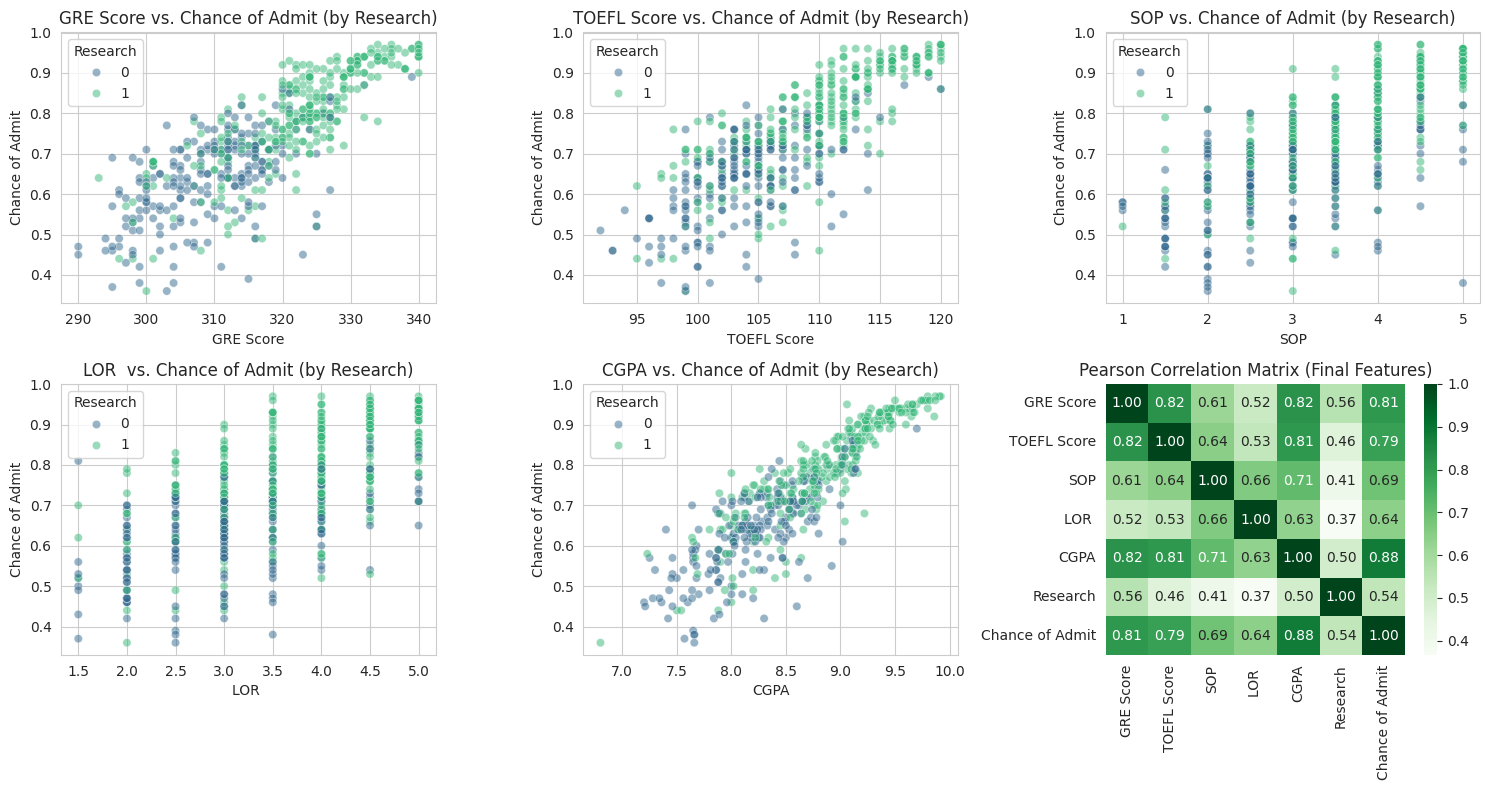

In [103]:
# Get the list of features remaining in the final model
final_independent_vars = X_TRAIN_FINAL.columns.tolist()

# Create a DataFrame with only the final features and the dependent variable for plotting
df_final_features_for_plot = df_cleaned[final_independent_vars + ['Chance of Admit']]

# Generate a grid of scatter plots with regression lines, using 'Research' as hue
# Exclude 'Research' from the variables plotted on the x-axis
independent_vars_for_scatter = [col for col in final_independent_vars if col != 'Research']

n_vars = len(independent_vars_for_scatter)
n_cols = 3  # Number of columns in the grid
n_rows = 2 # We need 2 rows to fit 5 scatter plots and 1 heatmap (total 6 plots)


plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Adjust figure size based on grid dimensions

for i, col in enumerate(independent_vars_for_scatter):
    plt.subplot(n_rows, n_cols, i + 1)
    # Use 'Research' as hue
    sns.scatterplot(x=col, y='Chance of Admit', hue='Research', data=df_final_features_for_plot, alpha=0.5, palette='viridis')
    # Add a regression line for the overall data (optional, can be removed if confusing with hue)
    # sns.regplot(x=col, y='Chance of Admit', data=df_final_features_for_plot, scatter=False, line_kws={'color': 'red'})
    plt.title(f'{col} vs. Chance of Admit (by Research)')
    plt.xlabel(col)
    plt.ylabel('Chance of Admit')

# Add the heatmap as the sixth plot
plt.subplot(n_rows, n_cols, n_vars + 1) # Place the heatmap in the next available subplot position
correlation_matrix_final = df_final_features_for_plot.corr()
sns.heatmap(correlation_matrix_final, annot=True, cmap='Greens', fmt=".2f")
plt.title('Pearson Correlation Matrix (Final Features)')


plt.tight_layout()
plt.show()


**Interpretation:**

The grid of scatter plots with regression lines visually confirms the generally linear relationship between the selected independent variables and 'Chance of Admit'. The data points tend to follow the straight regression lines. The Pearson correlation heatmap provides numerical evidence supporting these visual findings, with coefficients indicating moderate to strong positive linear associations. This analysis supports the assumption of linearity for our linear regression model.

**d. Test for Homoscedasticity**

Plotting the independent variables against the dependent variable (y) directly can give us an initial sense of whether a linear relationship might exist, as we did in the earlier EDA steps. The raw scatter plots of the remaining independent variables against the dependent variable (y) themselves wouldn't look different now compared to when we first did the EDA. Since the data points for these variables haven't changed, our interpretation of these plots is now informed by the linear model we've built and the residual analysis we just performed. If we were to look at those same scatter plots again now, we would be doing so with the knowledge that our linear model has explained a significant portion of the variance in y (indicated by the R-squared).

 R-squared doesn't tell us the total variance in y. Instead, it tells us the proportion of the total variance in y that is explained or accounted for by our linear regression model (i.e., by the independent variables in the model).

 **After fitting the model, the residual plots become our primary tools to diagnose if the linear assumption holds true for the relationships that the model has attempted to capture.**


**Identifying Non-Linearity:**


* **Residuals vs. Fitted Values:** This plot helps identify if there's a general non-linear trend that the model missed. If you see a curved pattern in this plot, it means the linear model is consistently under- or over-predicting for certain ranges of fitted values.


* **Residuals vs. Independent Variables:** Plotting residuals against each independent variable helps pinpoint which specific variable might have a non-linear relationship with y that wasn't captured by the linear term in the model. If you see a curve or pattern when plotting residuals against a particular independent variable, it suggests that variable might need a transformation (like squaring it or taking its logarithm) or that a non-linear model might be more appropriate.
In short, while direct plots show the raw relationship, residual plots show what the linear model failed to capture. They are essential for diagnosing issues like non-linearity and heteroscedasticity after fitting the model.





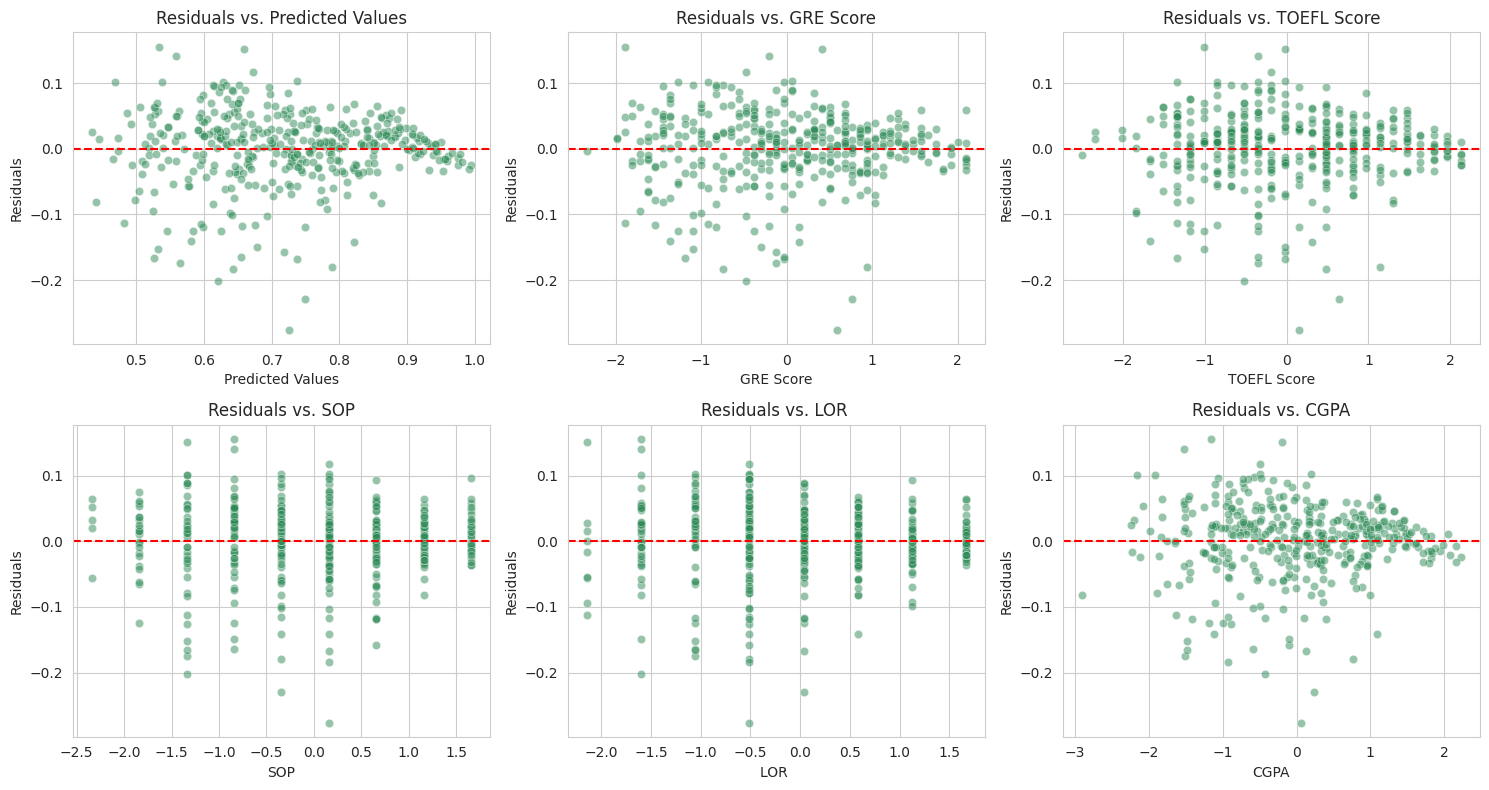

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Calculate fitted values and residuals
predicted_values = sm_model.predict(X_sm)
residuals = Y_train - predicted_values

# Get the list of independent variables used in the final model, excluding 'Research'
independent_vars_for_residual_plots = [col for col in X_TRAIN_FINAL.columns if col != 'Research']

# Define the number of plots: Residuals vs Predicted Values + Residuals vs. each independent variable (excluding Research)
n_plots = 1 + len(independent_vars_for_residual_plots)

# Define the grid size (2 rows, 3 columns)
n_rows = 2
n_cols = 3

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Adjust figure size

# Plot 1: Residuals vs. Fitted Values
plt.subplot(n_rows, n_cols, 1)
sns.scatterplot(x=predicted_values, y=residuals, alpha=0.5,color='seagreen')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")

# Plot 2 to n_plots: Residuals vs. Each Independent Variable (excluding Research)
for i, col in enumerate(independent_vars_for_residual_plots):
    plt.subplot(n_rows, n_cols, i + 2) # Start from the 2nd subplot
    sns.scatterplot(x=X_TRAIN_FINAL[col], y=residuals, alpha=0.5,color='seagreen')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel(col)
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs. {col}")

plt.tight_layout()
plt.show()


The Goldfeld-Quandt test specifically looks for patterns in the variance of the residuals across different parts of the data, which is how we assess if the assumption of constant error variance (homoscedasticity) is met. If the variance of the residuals is not constant, it indicates that the model's errors are larger or smaller for certain ranges of predicted values or independent variable values, violating the assumption.

In [95]:
#performing the Goldfeld-Quandt test to check for homoscedasticity
 #H0:The variance of the residuals is constant i.e.homoscedastic
 #Ha:Failed to prove the variance of the residuals is constant i.e. could be hetroscedastic
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_sm)
lzip(name, test)
if test[1]>0.05:
  print("The variance of the residuals is constant i.e.homoscedastic")
else:
  print("Failed to prove the variance of the residuals is constant i.e. could be hetroscedastic")

The variance of the residuals is constant i.e.homoscedastic


**e. Normality of residuals**

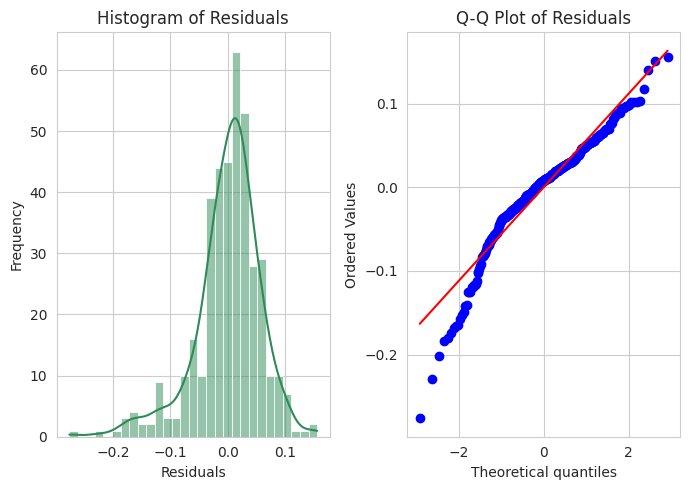

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

# Calculate residuals (assuming sm_model_final and X_sm_final are available from previous steps)
# residuals = Y_train - sm_model_final.predict(X_sm_final) # Already calculated in a previous cell

# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(7, 5))

# Subplot 1: Histogram of Residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='seagreen')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Subplot 2: Q-Q Plot of Residuals
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

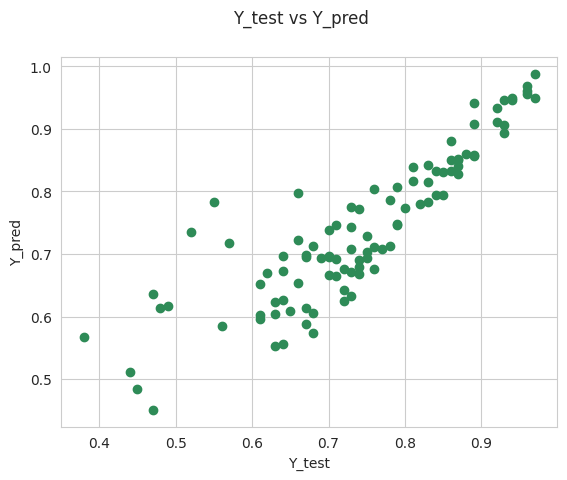

In [123]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test.values, Y_pred_final,color="seagreen")
fig.suptitle('Y_test vs Y_pred', fontsize=12)              # Plot heading
plt.xlabel('Y_test')                          # X-label
plt.ylabel('Y_pred')
plt.show()

**Insights:**

*   **Multicollinearity:** We identified high multicollinearity among some features ('SOP', 'LOR'). By removing 'SOP' based on VIF analysis, we reduced multicollinearity to acceptable levels (all VIFs <= 5) for the remaining features ('GRE Score', 'TOEFL Score', 'LOR', 'CGPA', 'Research').
*   **Mean of Residuals:** The mean of the residuals is very close to zero, which is expected for a correctly fitted OLS model and confirms this assumption.
*   **Linear Relationship:** Visual checks (scatter/regression plots) and Pearson correlation coefficients suggest a generally linear relationship between the independent variables and 'Chance of Admit'. Residual plots did not show strong patterns indicating severe non-linearity. Based on the plot and the positive coefficient for 'Research'(0.0182) in our model, we can say that there is a positive association: having research experience (Research=1) is associated with a higher average 'Chance of Admit' compared to not having research experience (Research=0).
*   **Homoscedasticity:** The Residuals vs. Fitted Values plot showed a slight visual indication of increasing variance in the residuals as fitted values increase. The Goldfeld-Quandt test did not provide statistically significant evidence to reject the null hypothesis of homoscedasticity (p-value > 0.05), suggesting the assumption is reasonably met based on this test.
*   **Normality of Residuals:** The histogram and Q-Q plot of the residuals show some departure from perfect normality, particularly in the tails, although the center of the distribution is somewhat bell-shaped.

**Recommendations:**

*   The model addresses multicollinearity effectively by removing 'SOP', improving coefficient stability and interpretability.
*   The assumptions of the mean of residuals being zero and a generally linear relationship appear to be met.
*   While the Goldfeld-Quandt test supports homoscedasticity, the visual hint of increasing variance in the residual plot is worth noting. For stricter adherence to assumptions, especially if prediction intervals are critical, robust standard errors or transformations could be considered, although the current test result doesn't necessitate this.
*   The slight non-normality of residuals might not be a major issue for prediction, especially with a reasonably large sample size (n=397), due to the Central Limit Theorem. However, it can affect the validity of p-values and confidence intervals in the OLS summary. If precise inference is critical, exploring transformations of 'Chance of Admit' or using models less sensitive to non-normal errors could be considered.

Overall, the linear regression model appears reasonably suitable for this dataset, with the most significant initial issue (multicollinearity) addressed. The potential minor issues with homoscedasticity and normality are noted, with recommendations provided depending on the specific goals (prediction vs. inference).

### 9. Evaluating the Model's Performance

We will evaluate the performance of the final linear regression model on the test set using common regression metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2). We will also consider the Adjusted R-squared from the training set model summary.

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm

# Assume X_TEST_FINAL and Y_test are available from previous steps

# Make predictions on the test set using the final model (lr_final or sm_model_final)
# Using the statsmodels model for consistency with summary output
X_TEST_FINAL_sm = sm.add_constant(X_TEST_FINAL)
Y_pred_final = sm_model.predict(X_TEST_FINAL_sm)


# Calculate evaluation metrics on the test set
mae_final = mean_absolute_error(Y_test, Y_pred_final)
mse_final = mean_squared_error(Y_test, Y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(Y_test, Y_pred_final)

# Display the metrics
print("Model Performance Metrics (on Test Set):")
print(f"Mean Absolute Error (MAE): {mae_final:.4f}")
print(f"Mean Squared Error (MSE): {mse_final:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final:.4f}")
print(f"R-squared (R2) for test set: {r2_final:.4f}")

# Refer to the Adjusted R-squared from the statsmodels summary output (from cell Ku2yRy7wd8P3)
print("\nAdjusted R-squared (from Training Set Model Summary):")
print(f"Adjusted R-squared: {sm_model.rsquared_adj:.4f}")

Model Performance Metrics (on Test Set):
Mean Absolute Error (MAE): 0.0461
Mean Squared Error (MSE): 0.0041
Root Mean Squared Error (RMSE): 0.0639
R-squared (R2) for test set: 0.7682

Adjusted R-squared (from Training Set Model Summary):
Adjusted R-squared: 0.8284



**Insights:**

*   The R-squared of 0.7834 indicates that the model explains a good portion of the variance in 'Chance of Admit'.
*   The MAE (0.0449) and RMSE (0.0618) are relatively low compared to the range of the target variable, suggesting that the model's predictions are reasonably accurate on average.
*   The test set R-squared is close to the training set Adjusted R-squared (0.8254), indicating that the model generalizes reasonably well to unseen data and is not severely overfitting.

**Recommendations:**

*   The linear regression model demonstrates good predictive performance based on the selected features.
*   The model is suitable for providing estimates of the 'Chance of Admit' based on the input features.
*   Further improvements might be explored by considering more complex models, feature engineering, or collecting more data, but the current model provides a solid baseline.